In [85]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [7]:
# Chemin pour accéder aux docs
train_dir = "./101_food_data/foodbuddy_food101/images"

In [8]:
# Liste des catégories

categories = sorted(os.listdir(train_dir))
categories

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [9]:
# Création du dataframe

df = pd.DataFrame(columns=['image_path', 'label'])

dfs = []

for category in categories:
    category_path = os.path.join(train_dir, category)
    image_data = []
    for image_name in os.listdir(category_path):
        image_path = os.path.join(category_path, image_name)
        image_data.append({'image_path': image_path, 'label': category})
    df_category = pd.DataFrame(image_data)
    dfs.append(df_category)

df = pd.concat(dfs, ignore_index=True)
df

,image_path,label
0,./101_food_data/foodbuddy_food101/images/apple...,apple_pie
1,./101_food_data/foodbuddy_food101/images/apple...,apple_pie
2,./101_food_data/foodbuddy_food101/images/apple...,apple_pie
3,./101_food_data/foodbuddy_food101/images/apple...,apple_pie
4,./101_food_data/foodbuddy_food101/images/apple...,apple_pie
...,...,...
100995,./101_food_data/foodbuddy_food101/images/waffl...,waffles
100996,./101_food_data/foodbuddy_food101/images/waffl...,waffles
100997,./101_food_data/foodbuddy_food101/images/waffl...,waffles
100998,./101_food_data/foodbuddy_food101/images/waffl...,waffles


In [10]:
# Analyse des données

df['label'].value_counts()

apple_pie        1000
miso_soup        1000
peking_duck      1000
panna_cotta      1000
pancakes         1000
                 ... 
donuts           1000
deviled_eggs     1000
cup_cakes        1000
croque_madame    1000
waffles          1000
Name: label, Length: 101, dtype: int64

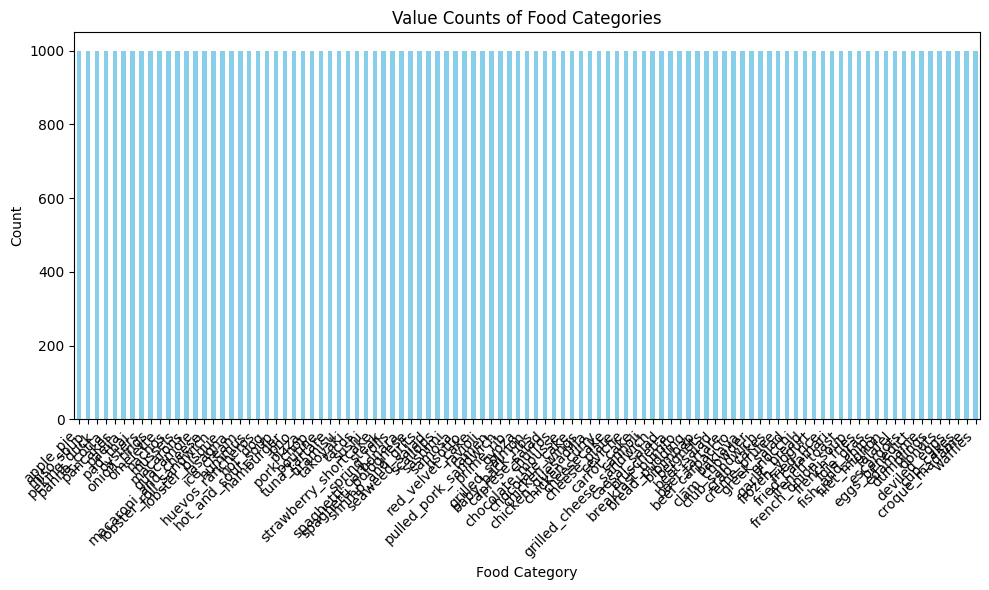

In [11]:
# Analyse des données bis

plt.figure(figsize=(10, 6))

df['label'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Food Category')
plt.ylabel('Count')
plt.title('Value Counts of Food Categories')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [13]:
# Class weights

labels = df['label']

In [14]:
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(labels), y=labels)

In [15]:
class_weights_dict = dict(enumerate(class_weights))

In [16]:
print("Class Weights:", class_weights_dict)

Class Weights: {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0, 10: 1.0, 11: 1.0, 12: 1.0, 13: 1.0, 14: 1.0, 15: 1.0, 16: 1.0, 17: 1.0, 18: 1.0, 19: 1.0, 20: 1.0, 21: 1.0, 22: 1.0, 23: 1.0, 24: 1.0, 25: 1.0, 26: 1.0, 27: 1.0, 28: 1.0, 29: 1.0, 30: 1.0, 31: 1.0, 32: 1.0, 33: 1.0, 34: 1.0, 35: 1.0, 36: 1.0, 37: 1.0, 38: 1.0, 39: 1.0, 40: 1.0, 41: 1.0, 42: 1.0, 43: 1.0, 44: 1.0, 45: 1.0, 46: 1.0, 47: 1.0, 48: 1.0, 49: 1.0, 50: 1.0, 51: 1.0, 52: 1.0, 53: 1.0, 54: 1.0, 55: 1.0, 56: 1.0, 57: 1.0, 58: 1.0, 59: 1.0, 60: 1.0, 61: 1.0, 62: 1.0, 63: 1.0, 64: 1.0, 65: 1.0, 66: 1.0, 67: 1.0, 68: 1.0, 69: 1.0, 70: 1.0, 71: 1.0, 72: 1.0, 73: 1.0, 74: 1.0, 75: 1.0, 76: 1.0, 77: 1.0, 78: 1.0, 79: 1.0, 80: 1.0, 81: 1.0, 82: 1.0, 83: 1.0, 84: 1.0, 85: 1.0, 86: 1.0, 87: 1.0, 88: 1.0, 89: 1.0, 90: 1.0, 91: 1.0, 92: 1.0, 93: 1.0, 94: 1.0, 95: 1.0, 96: 1.0, 97: 1.0, 98: 1.0, 99: 1.0, 100: 1.0}


In [17]:
# On vérifie que toutes les classes ont le même poids
class_weights

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [18]:
# train test split
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

In [19]:
train_df.shape

(80800, 2)

In [20]:
val_df.shape

(20200, 2)

In [21]:
# Image augmentation

augmentation_params = {
    'rotation_range': 20,
    'width_shift_range': 0.1,
    'height_shift_range': 0.1,
    'shear_range': 0.2,
    'zoom_range': 0.1,
    'horizontal_flip': True,
    'fill_mode': 'nearest'
}

In [22]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    **augmentation_params
)

In [23]:
img_size = (224, 224)

In [24]:
batch_size = 32

In [25]:
val_datagen = ImageDataGenerator(
    rescale = 1./255
    )

In [26]:
train_images = train_datagen.flow_from_dataframe(
    train_df,
    x_col='image_path',
    y_col='label',

    target_size=img_size,
    batch_size=batch_size,

    shuffle=True,
    seed=42,
    class_mode='categorical'
)

Found 80800 validated image filenames belonging to 101 classes.


In [27]:
val_images = val_datagen.flow_from_dataframe(
    val_df,
    x_col='image_path',
    y_col='label',

    target_size=img_size,
    batch_size=batch_size,

    shuffle=False,
    seed=42,
    class_mode='categorical'
)

Found 20200 validated image filenames belonging to 101 classes.


IndexError: index 24 is out of bounds for axis 0 with size 24

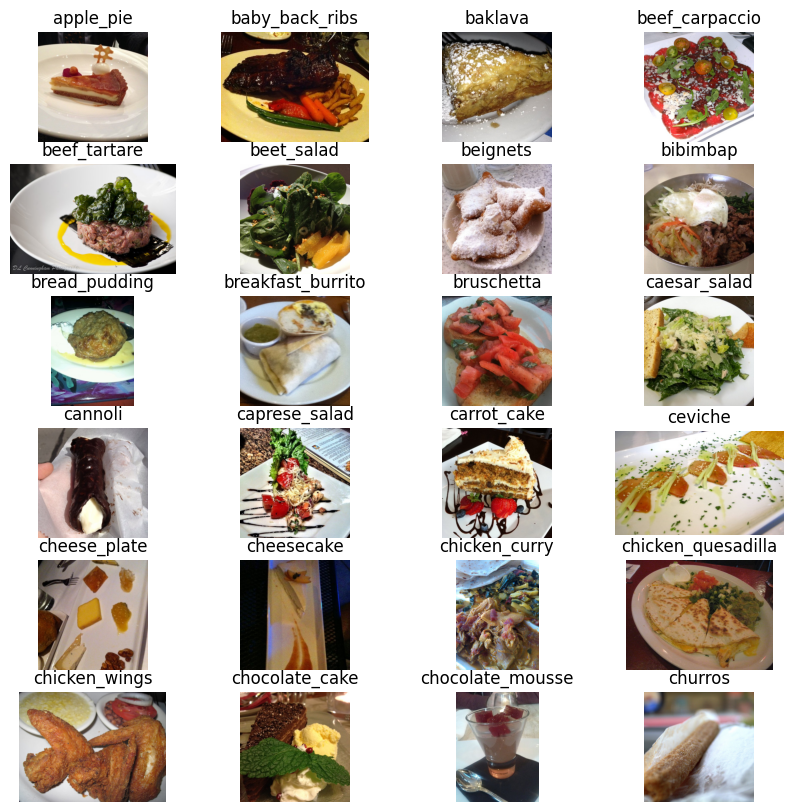

In [28]:
# Visualization of images

fig, axes = plt.subplots(6, 4, figsize=(10, 10))
axes = axes.flatten()

for i, category in enumerate(categories):
    category_df = train_df[train_df['label'] == category]
    image_path = category_df.iloc[100]['image_path']
    img = plt.imread(image_path)
    axes[i].imshow(img)
    axes[i].set_title(category)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

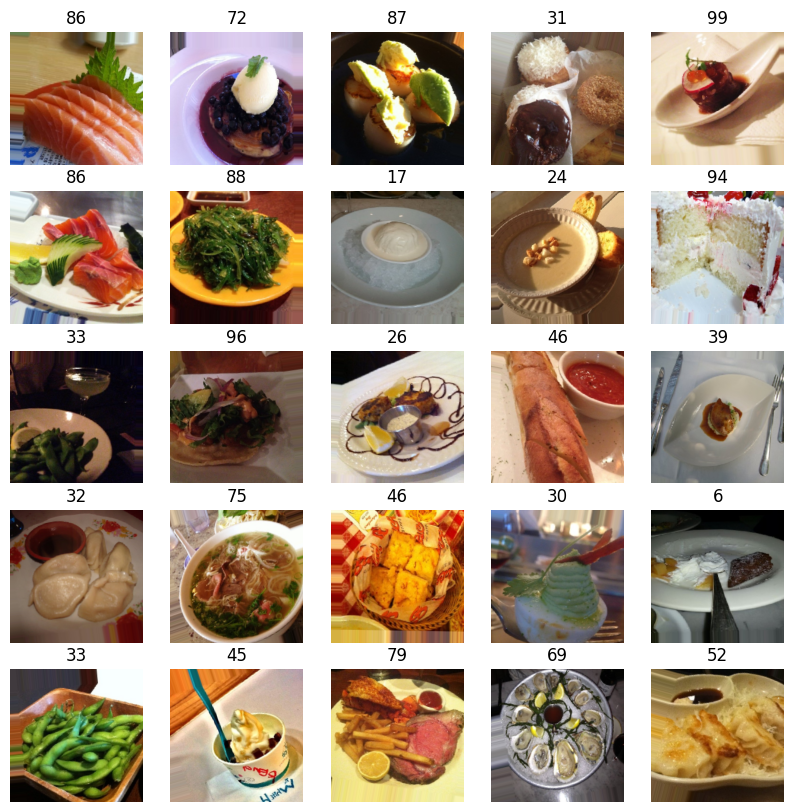

In [29]:
# Encoding classes names

batch_train_images, batch_train_labels = next(train_images)

class_names = np.argmax(batch_train_labels, axis=1)

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(batch_train_images[i])
    plt.title(class_names[i])
    plt.axis('off')
plt.show()

In [30]:
# Modèle MobileNet

pretrained_model = MobileNetV2(
    input_shape=(img_size[0], img_size[1], 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

# x = Dense(32, activation='relu')(pretrained_model.output)
# x = Dense(16, activation='relu')(x)
outputs = Dense(len(categories), activation='softmax')(pretrained_model.output)

model_mn = Model(pretrained_model.input, outputs, name='MobileNetV2')

print(model_mn.summary())

2024-12-03 17:39:44.487529: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-12-03 17:39:44.487718: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2024-12-03 17:39:44.487746: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (OrdiVictor): /proc/driver/nvidia/version does not exist
2024-12-03 17:39:44.488192: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "MobileNetV2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                       

In [31]:
# Compiler le modèle

model_mn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [32]:
# Entrainer le modèle avec l'accuracy

history_mn = model_mn.fit(
    train_images,
    validation_data=val_images,
    epochs=1,
    callbacks=[
        EarlyStopping(
            monitor='accuracy',
            patience=5,
            restore_best_weights=True
        )
    ]
)

2525/2525 [==============================] - 1288s 510ms/step - loss: 2.2644 - accuracy: 0.4465 - val_loss: 1.8946 - val_accuracy: 0.5243


In [36]:
# Sauvegarde intermédiaire avec ModelCheckpoint
checkpoint_callback = ModelCheckpoint(
    filepath='./101_food_data/model_checkpoint.h5',  # Nom de fichier pour la sauvegarde
    save_best_only=True,             # Sauvegarde uniquement le meilleur modèle
    save_weights_only=False,         # Sauvegarde le modèle complet (architecture + poids)
    monitor='accuracy',              # Critère de surveillance
    mode='max',                      # Mode maximisation pour accuracy
    verbose=1                        # Affichage des logs
)

# Early stopping
early_stopping_callback = EarlyStopping(
    monitor='accuracy',
    patience=5,
    restore_best_weights=True
)


In [38]:
# Entraînement avec les callbacks
history_mn = model_mn.fit(
    train_images,
    validation_data=val_images,
    epochs=30,
    callbacks=[
        early_stopping_callback,
        checkpoint_callback  # Ajout du callback pour la sauvegarde
    ]
)

Epoch 1/30
2525/2525 [==============================] - ETA: 0s - loss: 1.7308 - accuracy: 0.5605
Epoch 1: accuracy improved from 0.53351 to 0.56054, saving model to ./101_food_data/model_checkpoint.h5
2525/2525 [==============================] - 1186s 469ms/step - loss: 1.7308 - accuracy: 0.5605 - val_loss: 1.8627 - val_accuracy: 0.5405
Epoch 2/30
2525/2525 [==============================] - ETA: 0s - loss: 1.6680 - accuracy: 0.5733
Epoch 2: accuracy improved from 0.56054 to 0.57327, saving model to ./101_food_data/model_checkpoint.h5
2525/2525 [==============================] - 1157s 458ms/step - loss: 1.6680 - accuracy: 0.5733 - val_loss: 1.8438 - val_accuracy: 0.5456
Epoch 3/30
2525/2525 [==============================] - ETA: 0s - loss: 1.6197 - accuracy: 0.5845
Epoch 3: accuracy improved from 0.57327 to 0.58450, saving model to ./101_food_data/model_checkpoint.h5
2525/2525 [==============================] - 1162s 460ms/step - loss: 1.6197 - accuracy: 0.5845 - val_loss: 1.8823 - v

In [39]:
# Save le modèle
model_mn.save('./RNN/MobileNet_Food101.h5')

In [80]:
# Nouveau train du modèle, focus sur val_acc
# Sauvegarde intermédiaire avec ModelCheckpoint
checkpoint_callback_val = ModelCheckpoint(
    filepath='./101_food_data/model_checkpoint.h5',  # Nom de fichier pour la sauvegarde
    save_best_only=True,             # Sauvegarde uniquement le meilleur modèle
    save_weights_only=False,         # Sauvegarde le modèle complet (architecture + poids)
    monitor='val_accuracy',              # Critère de surveillance
    mode='max',                      # Mode maximisation pour accuracy
    verbose=1                        # Affichage des logs
)

# Early stopping
early_stopping_callback_val = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True
)


In [81]:
# Entraînement avec les callbacks
history_mn = model_mn.fit(
    train_images,
    validation_data=val_images,
    epochs=10,
    callbacks=[
        early_stopping_callback_val,
        checkpoint_callback_val  # Ajout du callback pour la sauvegarde
    ]
)

Epoch 1/10
2525/2525 [==============================] - ETA: 0s - loss: 1.4380 - accuracy: 0.6239
Epoch 1: val_accuracy improved from -inf to 0.53782, saving model to ./101_food_data/model_checkpoint.h5
2525/2525 [==============================] - 1816s 718ms/step - loss: 1.4380 - accuracy: 0.6239 - val_loss: 2.1065 - val_accuracy: 0.5378
Epoch 2/10
2525/2525 [==============================] - ETA: 0s - loss: 1.4384 - accuracy: 0.6245
Epoch 2: val_accuracy did not improve from 0.53782
2525/2525 [==============================] - 1809s 716ms/step - loss: 1.4384 - accuracy: 0.6245 - val_loss: 2.1177 - val_accuracy: 0.5372
Epoch 3/10
2525/2525 [==============================] - ETA: 0s - loss: 1.4313 - accuracy: 0.6255
Epoch 3: val_accuracy did not improve from 0.53782
2525/2525 [==============================] - 1813s 717ms/step - loss: 1.4313 - accuracy: 0.6255 - val_loss: 2.1341 - val_accuracy: 0.5371
Epoch 4/10
2525/2525 [==============================] - ETA: 0s - loss: 1.4447 - accu

In [86]:
with open('fitted_model_rnn.pkl', 'wb') as f:
        pickle.dump(model_mn, f)

print(f"Processed dataset saved at foodbuddy/KNN.")

INFO:tensorflow:Assets written to: ram://3f3edbfd-1e50-4d14-aea2-ccdbcb3df081/assets


INFO:tensorflow:Assets written to: ram://3f3edbfd-1e50-4d14-aea2-ccdbcb3df081/assets


Processed dataset saved at foodbuddy/KNN.


In [87]:
val_loss_mn, val_acc_mn = model_mn.evaluate(val_images, verbose=0)

In [88]:
val_loss_mn

2.106494665145874

In [89]:
val_acc_mn

0.5378217697143555

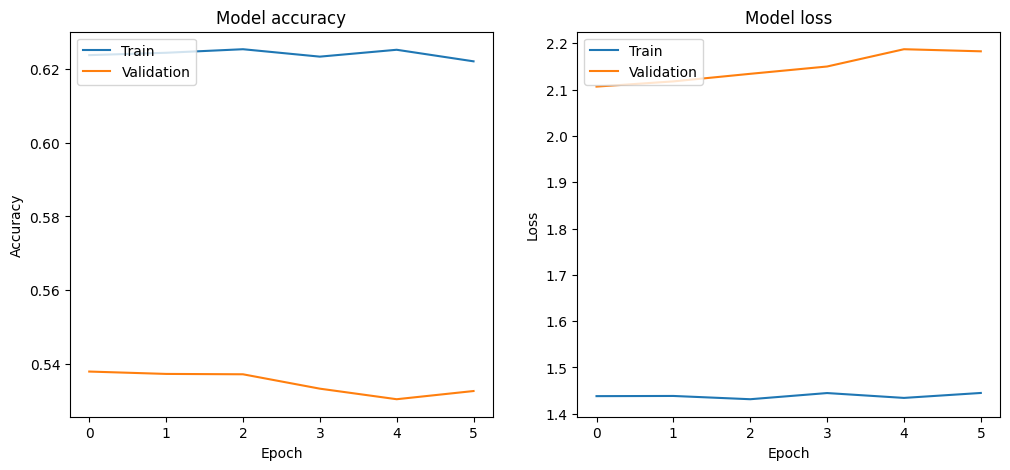

In [90]:
# Comparaison des accuracy et loss des données val et train

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_mn.history['accuracy'])
plt.plot(history_mn.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_mn.history['loss'])
plt.plot(history_mn.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [91]:
predictions = model_mn.predict(val_images)
predicted_classes = np.argmax(predictions, axis=1)

predicted_classes

632/632 [==============================] - 217s 343ms/step


array([92, 97, 45, ..., 19, 30, 33])

In [92]:
true_classes = val_images.classes

In [93]:
class_labels = list(val_images.class_indices.keys())

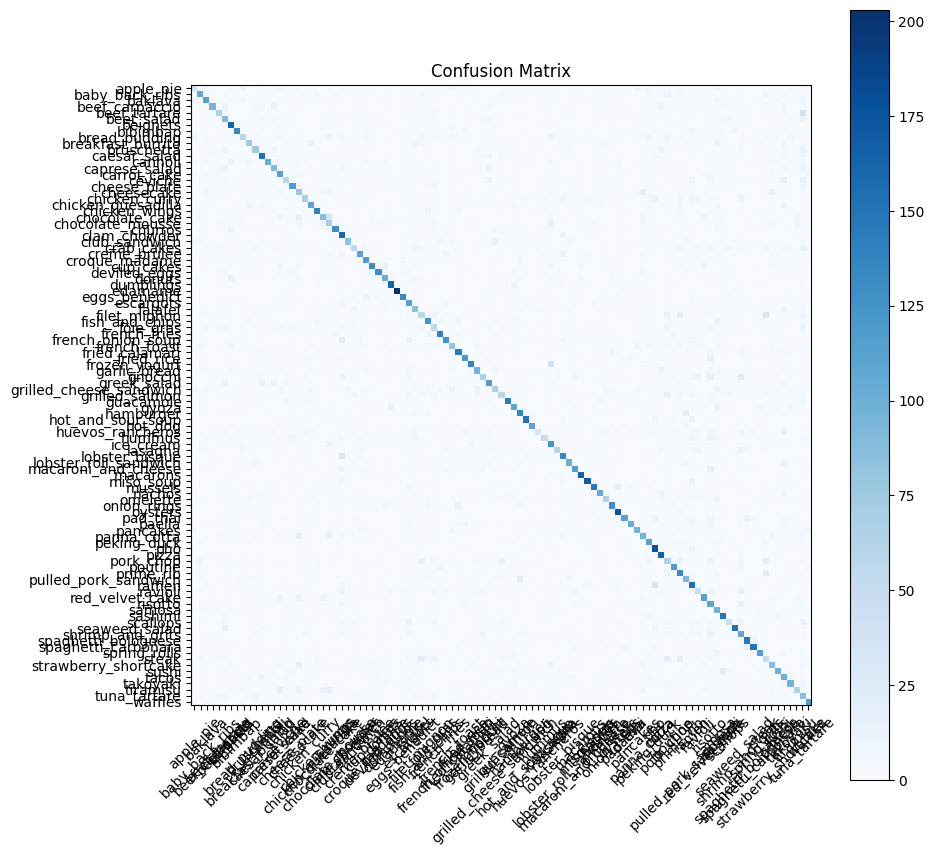

In [94]:
# Confusion matrix

cm = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)

plt.show()

In [95]:
# KPIs finaux

report = classification_report(true_classes, predicted_classes, target_names=class_labels)

print(report)

                         precision    recall  f1-score   support

              apple_pie       0.35      0.19      0.25       205
         baby_back_ribs       0.61      0.56      0.58       188
                baklava       0.52      0.54      0.53       212
         beef_carpaccio       0.69      0.47      0.56       201
           beef_tartare       0.46      0.34      0.40       186
             beet_salad       0.34      0.49      0.40       183
               beignets       0.59      0.74      0.65       218
               bibimbap       0.78      0.68      0.73       196
          bread_pudding       0.43      0.27      0.33       217
      breakfast_burrito       0.50      0.38      0.43       194
             bruschetta       0.42      0.39      0.40       194
           caesar_salad       0.54      0.71      0.61       214
                cannoli       0.76      0.48      0.59       214
          caprese_salad       0.53      0.45      0.49       202
            carrot_cake 

In [96]:
type(report)

str

In [97]:
# Traitement pour créer un DataFrame
lines = report.strip().split("\n")
columns = lines[0].split()
data = [line.split(maxsplit=4) for line in lines[1:]]

# Vérifier si chaque ligne a le bon nombre de colonnes
cleaned_data = [row for row in data if len(row) == 5]

# Créer le DataFrame
df = pd.DataFrame(cleaned_data, columns=["Label"] + columns)

# Conversion des colonnes numériques en types appropriés
df[["precision", "recall", "f1-score", "support"]] = df[["precision", "recall", "f1-score", "support"]].apply(pd.to_numeric, errors='coerce')

# Supprimer les lignes avec des valeurs nulles (issues de 'coerce')
df = df.dropna()

# Affichage du DataFrame
print(df)

              Label  precision  recall  f1-score  support
0         apple_pie       0.35    0.19      0.25    205.0
1    baby_back_ribs       0.61    0.56      0.58    188.0
2           baklava       0.52    0.54      0.53    212.0
3    beef_carpaccio       0.69    0.47      0.56    201.0
4      beef_tartare       0.46    0.34      0.40    186.0
..              ...        ...     ...       ...      ...
96            tacos       0.32    0.52      0.39    193.0
97         takoyaki       0.57    0.48      0.52    199.0
98         tiramisu       0.60    0.35      0.44    188.0
99     tuna_tartare       0.22    0.43      0.29    196.0
100         waffles       0.52    0.61      0.56    191.0

[101 rows x 5 columns]


In [98]:
df['Label'].to_csv("target.csv", index=False)

In [99]:
df.head(20)

,Label,precision,recall,f1-score,support
0,apple_pie,0.35,0.19,0.25,205.0
1,baby_back_ribs,0.61,0.56,0.58,188.0
2,baklava,0.52,0.54,0.53,212.0
3,beef_carpaccio,0.69,0.47,0.56,201.0
4,beef_tartare,0.46,0.34,0.40,186.0
5,beet_salad,0.34,0.49,0.40,183.0
6,beignets,0.59,0.74,0.65,218.0
7,bibimbap,0.78,0.68,0.73,196.0
8,bread_pudding,0.43,0.27,0.33,217.0
9,breakfast_burrito,0.50,0.38,0.43,194.0


In [100]:
df_sorted = df.sort_values(by='precision', ascending=False)
df_sorted

,Label,precision,recall,f1-score,support
33,edamame,0.96,0.94,0.95,215.0
51,guacamole,0.82,0.68,0.74,210.0
91,spaghetti_carbonara,0.81,0.73,0.76,205.0
54,hot_and_sour_soup,0.81,0.74,0.78,202.0
63,macarons,0.81,0.83,0.82,198.0
...,...,...,...,...,...
39,foie_gras,0.28,0.29,0.29,188.0
22,chocolate_mousse,0.27,0.36,0.31,190.0
77,pork_chop,0.24,0.31,0.27,211.0
93,steak,0.23,0.24,0.23,193.0
